In [1]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib qt

import numpy as np
from numpy import *
from scipy.fft import fft, ifft, fftshift, ifftshift
from scipy.optimize import curve_fit

import os
import scipy.io as sio

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise'

folders = os.listdir(initial_folder)
for i in range(len(folders)):
    if ".fig" in folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', folders[i]) 

[0] -----------> -22db_DC_sweep.png
[1] -----------> -28db_DC_sweep.png
[2] -----------> 1f noise
[3] -----------> 1st_tone
[4] -----------> 2023-09-18
[5] -----------> 2023-09-19
[6] -----------> 2023-09-20
[7] -----------> 2023-09-26
[8] -----------> 2nd_tone
[9] -----------> Full_BW_noise
[10] -----------> InteProd_DC_sweep_fp_m10_fm_24
[11] -----------> Intermodulation products
[12] -----------> Intermodulation products_no_filter
[13] -----------> IntProd graphs
[14] -----------> IntProd_DC_sweep_fp_m10_fm_m22
[15] -----------> IntProd_DC_sweep_fp_m10_fm_m22_no_2nd_mode
[16] -----------> IntProd_DC_sweep_fp_m10_fm_m28
[17] -----------> IntProd_DC_sweep_fp_m12_fm_m22
[18] -----------> IntProd_DC_sweep_fp_m12_fm_m24
[19] -----------> IntProd_DC_sweep_fp_m12_fm_m28
[20] -----------> IntProd_DC_sweep_fp_m4_fm_m28
[21] -----------> IntProd_DC_sweep_fp_m5_fm_m22
[22] -----------> IntProd_DC_sweep_fp_m5_fm_m24
[23] -----------> IntProd_DC_sweep_fp_m5_fm_m28
[24] -----------> IntProd_DC_sw

In [3]:
folder = folders[2]
folder2 = os.listdir(initial_folder+"\\"+folder)
for i in range(len(folder2)):
    if ".fig" in folder2[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', folder2[i]) 

[0] -----------> in_DC_SWS
[1] -----------> in_SWS_VNA
[2] -----------> VNA_test_no_reference
[3] -----------> VNA_test_reference
[4] -----------> VNA_test_reference_9m


In [4]:
folder22 = folder2[1]
files = os.listdir(initial_folder+"\\"+folder+"\\"+folder22)
for i in range(len(files)):
    if ".png" in files[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', files[i]) 

[3] -----------> 1f_noise_SWS att_0 flux_power -15__20-15-54.mat
[4] -----------> 1f_noise_SWS att_0 flux_power -30__20-15-54.mat
[5] -----------> 1f_noise_SWS att_0 flux_power -6__20-15-54.mat
[6] -----------> 1f_noise_SWS att_15 flux_power -15__12-40-33.mat
[7] -----------> 1f_noise_SWS att_15 flux_power -30__12-40-33.mat
[8] -----------> 1f_noise_SWS att_15 flux_power -6__12-40-33.mat
[9] -----------> 1f_noise_SWS att_35 flux_power -15__12-40-33.mat
[10] -----------> 1f_noise_SWS att_35 flux_power -30__12-40-33.mat
[11] -----------> 1f_noise_SWS att_35 flux_power -6__12-40-33.mat


In [5]:
file = files[3]
mat = sio.loadmat(initial_folder+"\\"+folder+"\\"+folder22+"\\"+file)

# flux_power = mat['flux_power'][0,0]
# flux_freq = mat['flux_freq'][0,0]
# vna_freq = mat['vna_freq'][0,0]
vna_bandwidth = mat['vna_bandwidth'][0,0]
vna_powers = mat['vna_powers'][0]
avg_total = mat['avg_total'][0,0]
number_of_points = mat['number_of_points'][0,0]

data = mat['data']

mat

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Sep 28 21:21:51 2023',
 '__version__': '1.0',
 '__globals__': [],
 'flux_power': array([[-15]]),
 'flux_freq': array([[1.1252e+10]]),
 'vna_freq': array([[5.826e+09]]),
 'vna_bandwidth': array([[10]]),
 'number_of_points': array([[201]]),
 'vna_powers': array([[-25, -20, -15, -10,  -5,   0]]),
 'avg_total': array([[30]]),
 'data': array([[[[ 1.26824942e+000,  1.26697919e+000,  1.26584562e+000, ...,
            1.24729417e+000,  1.24816244e+000,  1.24734003e+000],
          [-1.25049023e-001, -1.24389277e-001, -1.23743914e-001, ...,
           -1.10976328e-001, -1.11312448e-001, -1.10292628e-001]],
 
         [[ 1.24750665e+000,  1.24817881e+000,  1.24788723e+000, ...,
            1.24389510e+000,  1.24449516e+000,  1.24426435e+000],
          [-1.11580857e-001, -1.11604084e-001, -1.10981903e-001, ...,
           -1.08188941e-001, -1.08429792e-001, -1.08166875e-001]],
 
         [[ 1.24413327e+000,  1.24407670e+000,  1.2

In [6]:
shape(data)

(6, 30, 2, 201)

In [7]:
def fft_A(A):
    fft_A = abs(fftshift(fft(A))**2)
    return fft_A

def fft_f(bandwidth=vna_bandwidth, nop=number_of_points):
    f = np.linspace(-bandwidth/2, bandwidth/2, nop)
    return f

NameError: name 'freq' is not defined

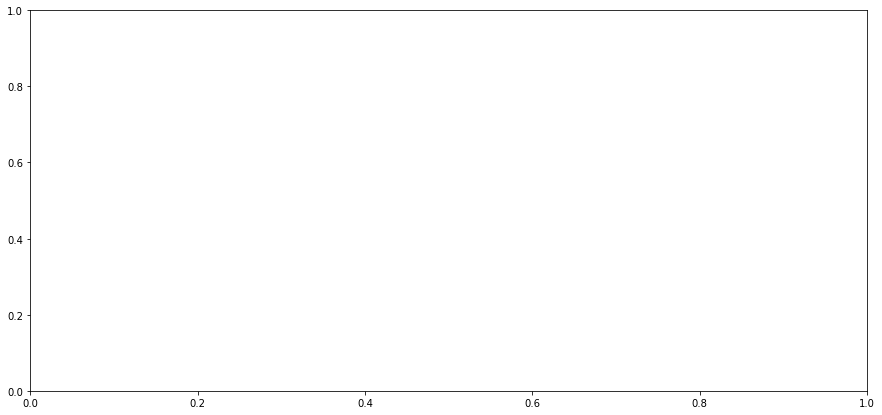

In [8]:
fig, ax = plt.subplots(figsize=(15,7), sharex=True)
ax.loglog(freq,fft_A(data[0, 1,:]))

NameError: name 'dc' is not defined

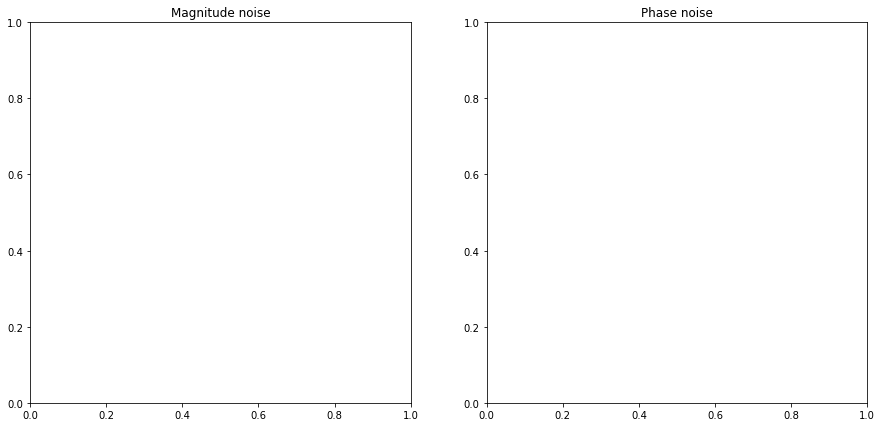

In [9]:
# vna_powers, avg, mag/pha
freq = fft_f(bandwidth=vna_bandwidth, nop=number_of_points)

fig, ax = plt.subplots(1,2,figsize=(15,7), sharex=True)
ax[0].set_title('Magnitude noise')
ax[1].set_title('Phase noise')

fig.suptitle('DC: {}'.format(dc), fontsize='large')

# for i in range(len(vna_powers)):

data_vp_mag_fft = np.empty((avg_total, number_of_points))
data_vp_pha_fft = np.empty((avg_total, number_of_points))

for k in range(avg_total): 
    data_vp_mag_fft[k,:] = fft_A(data[k, 0,:])
    data_vp_pha_fft[k,:] = fft_A(data[k, 1,:])

data_vp_mag_fft_mean = np.mean(data_vp_mag_fft, axis = 0) 
data_vp_pha_fft_mean = np.mean(data_vp_pha_fft, axis = 0) 

ax[0].loglog(freq, data_vp_mag_fft_mean, label = 'VNA_pow: {}'.format(dc))
ax[1].loglog(freq, data_vp_pha_fft_mean, label = 'VNA_pow: {}'.format(dc))

ax[0].legend()
ax[1].legend()

In [10]:
vna_powers

array([-25, -20, -15, -10,  -5,   0])

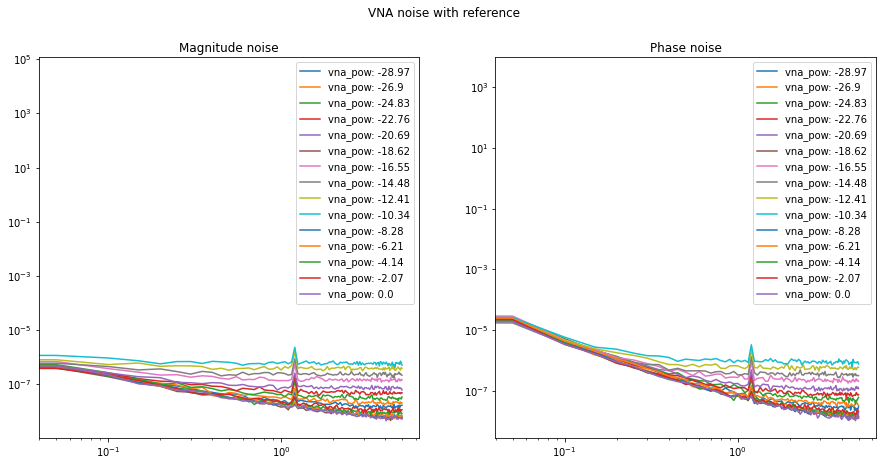

In [11]:
folder22 = folder2[2]
files = os.listdir(initial_folder+"\\"+folder+"\\"+folder22)

fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Magnitude noise')
ax[1].set_title('Phase noise')

fig.suptitle('VNA noise with reference', fontsize='large')

i=-1
while i<=len(files):
    i+=2
    if i<=len(files)-1:
        file = files[i]
        mat = sio.loadmat(initial_folder+"\\"+folder+"\\"+folder22+"\\"+file)
        vna_bandwidth = mat['vna_bandwidth'][0,0]
        vna_powers = mat['vna_powers'][0]
        avg_total = mat['avg_total'][0,0]
        number_of_points = mat['number_of_points'][0,0]

        data = mat['data']
        freq = fft_f(bandwidth=vna_bandwidth, nop=number_of_points)

        data_vp_mag_fft = np.empty((avg_total, number_of_points))
        data_vp_pha_fft = np.empty((avg_total, number_of_points))

        for k in range(avg_total): 
            data_vp_mag_fft[k,:] = fft_A(data[k, 0,:])
            data_vp_pha_fft[k,:] = fft_A(data[k, 1,:])

        data_vp_mag_fft_mean = np.mean(data_vp_mag_fft, axis = 0) 
        data_vp_pha_fft_mean = np.mean(data_vp_pha_fft, axis = 0) 

        ax[0].loglog(freq, data_vp_mag_fft_mean, label = 'vna_pow: {}'.format(np.round(vna_powers[i],2)))
        ax[1].loglog(freq, data_vp_pha_fft_mean, label = 'vna_pow: {}'.format(np.round(vna_powers[i],2)))

    
ax[0].legend()
ax[1].legend()

30


NameError: name 'linear_fit' is not defined

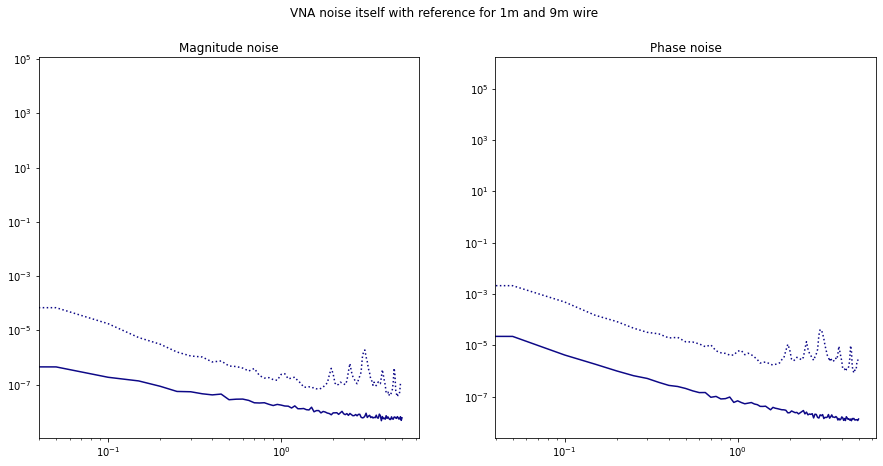

In [12]:
# compare two VNA spectrum

folder22 = folder2[2]
files_no_ref = os.listdir(initial_folder+"\\"+folder+"\\"+folder22)

folder22_ref = folder2[3]
files_ref = os.listdir(initial_folder+"\\"+folder+"\\"+folder22_ref)

folder22_9m = folder2[4]
files_9m = os.listdir(initial_folder+"\\"+folder+"\\"+folder22_9m)

fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Magnitude noise')
ax[1].set_title('Phase noise')

fig.suptitle('VNA noise itself with reference for 1m and 9m wire', fontsize='large')

file_no_ref = files_no_ref[0]
mat_no_ref = sio.loadmat(initial_folder+"\\"+folder+"\\"+folder22+"\\"+file_no_ref)
vna_powers_no_ref = mat_no_ref['vna_powers'][0]

ir = np.array([0, 5, 10, 15, 20, 25, 29])
# ir = array(np.linspace(0, 29, 30), dtype=int)

print(len(vna_powers_no_ref))
cmap = plt.get_cmap('plasma')
x = np.linspace(0, 1, int(len(ir))+1)
colors = cmap(x)
control_color = -1

fit_1f_ref_mag = np.array([])
fit_1f_no_ref_mag = np.array([])

fit_1f_ref_pha = np.array([])
fit_1f_no_ref_pha = np.array([])

for i in ir:
    control_color += 1
    file_no_ref = files_9m[i]
    mat_no_ref = sio.loadmat(initial_folder+"\\"+folder+"\\"+folder22_9m+"\\"+file_no_ref)
    vna_bandwidth = mat_no_ref['vna_bandwidth'][0,0]
    vna_powers_no_ref = mat_no_ref['vna_powers'][0]
    avg_total = mat_no_ref['avg_total'][0,0]
    number_of_points = mat_no_ref['number_of_points'][0,0]

    data_no_ref = mat_no_ref['data']
    freq = fft_f(bandwidth=vna_bandwidth, nop=number_of_points)

    data_vp_mag_fft_no_ref = np.empty((avg_total, number_of_points))
    data_vp_pha_fft_no_ref = np.empty((avg_total, number_of_points))

    for k in range(avg_total): 
        data_vp_mag_fft_no_ref[k,:] = fft_A(data_no_ref[k, 0,:])
        data_vp_pha_fft_no_ref[k,:] = fft_A(data_no_ref[k, 1,:])

    data_vp_mag_fft_mean_no_ref = np.mean(data_vp_mag_fft_no_ref, axis = 0) 
    data_vp_pha_fft_mean_no_ref = np.mean(data_vp_pha_fft_no_ref, axis = 0) 
    
    
    file_ref = files_ref[i]
    mat_ref = sio.loadmat(initial_folder+"\\"+folder+"\\"+folder22_ref+"\\"+file_ref)

    vna_powers_ref = mat_ref['vna_powers'][0]
    data_ref = mat_ref['data']

    data_vp_mag_fft_ref = np.empty((avg_total, number_of_points))
    data_vp_pha_fft_ref = np.empty((avg_total, number_of_points))

    for k in range(avg_total): 
        data_vp_mag_fft_ref[k,:] = fft_A(data_ref[k, 0,:])
        data_vp_pha_fft_ref[k,:] = fft_A(data_ref[k, 1,:])

    data_vp_mag_fft_mean_ref = np.mean(data_vp_mag_fft_ref, axis = 0) 
    data_vp_pha_fft_mean_ref = np.mean(data_vp_pha_fft_ref, axis = 0) 

    

    ax[0].loglog(freq, data_vp_mag_fft_mean_ref, color = colors[control_color], label = 'ref: vna_pow: {}'.format(np.round(vna_powers[i],2)))
    ax[1].loglog(freq, data_vp_pha_fft_mean_ref, color = colors[control_color], label = 'ref: vna_pow: {}'.format(np.round(vna_powers[i],2)))

    ax[0].loglog(freq, data_vp_mag_fft_mean_no_ref, color = colors[control_color], linestyle='dotted', label = 'ref+9m wire : vna_pow: {}'.format(np.round(vna_powers[i],2)))
    ax[1].loglog(freq, data_vp_pha_fft_mean_no_ref, color = colors[control_color], linestyle='dotted', label = 'ref+9m wire : vna_pow: {}'.format(np.round(vna_powers[i],2)))

    fr = freq[int(len(freq)/2):]
    pha_no_ref = data_vp_pha_fft_mean_no_ref[int(len(freq)/2):]
    mag_no_ref = data_vp_mag_fft_mean_no_ref[int(len(freq)/2):]

    pha_ref = data_vp_pha_fft_mean_no_ref[int(len(freq)/2):]
    mag_ref = data_vp_mag_fft_mean_no_ref[int(len(freq)/2):]
    start = 1
    stop = 10
    
    a, b = linear_fit(np.log(fr[start:stop]), np.log(mag_no_ref[start:stop]))
    fit_1f_no_ref_mag = np.append(fit_1f_no_ref_mag, a)
    
    a, b = linear_fit(np.log(fr[start:stop]), np.log(pha_no_ref[start:stop]))
    fit_1f_no_ref_pha = np.append(fit_1f_no_ref_pha, a)
    
    a, b = linear_fit(np.log(fr[start:stop]), np.log(mag_ref[start:stop]))
    fit_1f_ref_mag = np.append(fit_1f_ref_mag, a)
    
    a, b = linear_fit(np.log(fr[start:stop]), np.log(pha_ref[start:stop]))
    fit_1f_ref_pha = np.append(fit_1f_ref_pha, a)

        
ax[0].legend()
ax[1].legend()

fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Magnitude noise')
ax[1].set_title('Phase noise')
ax[0].plot(ir, fit_1f_ref_mag)
ax[1].plot(ir, fit_1f_ref_pha)

ax[0].plot(ir, fit_1f_no_ref_mag)
ax[1].plot(ir, fit_1f_no_ref_pha)

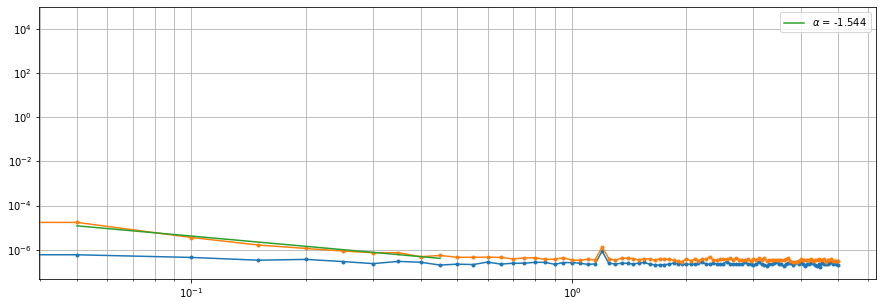

In [13]:
file_no_ref = files_no_ref[15]
mat_no_ref = sio.loadmat(initial_folder+"\\"+folder+"\\"+folder22+"\\"+file_no_ref)
vna_bandwidth = mat_no_ref['vna_bandwidth'][0,0]
vna_powers_no_ref = mat_no_ref['vna_powers'][0]
avg_total = mat_no_ref['avg_total'][0,0]
number_of_points = mat_no_ref['number_of_points'][0,0]

data_no_ref = mat_no_ref['data']
freq = fft_f(bandwidth=vna_bandwidth, nop=number_of_points)

data_vp_mag_fft_no_ref = np.empty((avg_total, number_of_points))
data_vp_pha_fft_no_ref = np.empty((avg_total, number_of_points))

for k in range(avg_total): 
    data_vp_mag_fft_no_ref[k,:] = fft_A(data_no_ref[k, 0,:])
    data_vp_pha_fft_no_ref[k,:] = fft_A(data_no_ref[k, 1,:])

data_vp_mag_fft_mean_no_ref = np.mean(data_vp_mag_fft_no_ref, axis = 0) 
data_vp_pha_fft_mean_no_ref = np.mean(data_vp_pha_fft_no_ref, axis = 0) 

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(freq[int(len(freq)/2):], data_vp_mag_fft_mean_no_ref[int(len(freq)/2):], '.-')
ax.plot(freq[int(len(freq)/2):], data_vp_pha_fft_mean_no_ref[int(len(freq)/2):], '.-')
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(True, which="both", ls="-")

fr = freq[int(len(freq)/2):]
pha = data_vp_pha_fft_mean_no_ref[int(len(freq)/2):]
mag = data_vp_mag_fft_mean_no_ref[int(len(freq)/2):]

fit_1f = np.array([])

def linear_func(x, a, b):
    return a * x + b

def linear_fit(x, y):
    popt, pcov = curve_fit(linear_func, x, y)
    a = popt[0]
    b = popt[1]
    return a, b

start = 1
stop = 10
freq_selected = fr[start:stop]
spect_m_selected = pha[start:stop]    

freq_selected_log = np.log(fr[start:stop])
spect_m_selected_log = np.log(pha[start:stop])   

a, b = linear_fit(np.log(freq_selected), np.log(spect_m_selected))



ax.plot(freq_selected, np.exp(linear_func(np.log(freq_selected), a, b)), label=r'$\alpha$ = %1.3f' % np.round(a, 3))
ax.legend()
ax.grid(True, which="both", ls="-")


# print('power from fit', a)